In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


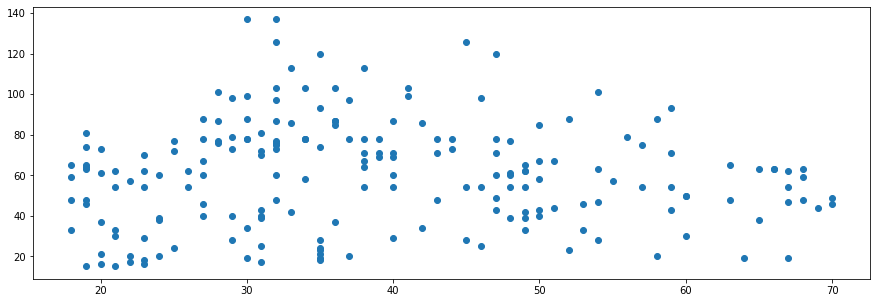

In [3]:
plt.figure(figsize=(15,5))
plt.scatter(df.Age, df['Annual Income (k$)'])

In [10]:
n_range = range(1,10)
n_sse = []
for x in n_range:
    km = KMeans(n_clusters=x)
    km.fit_predict(df[['Age','Annual Income (k$)']])
    n_sse.append(km.inertia_)

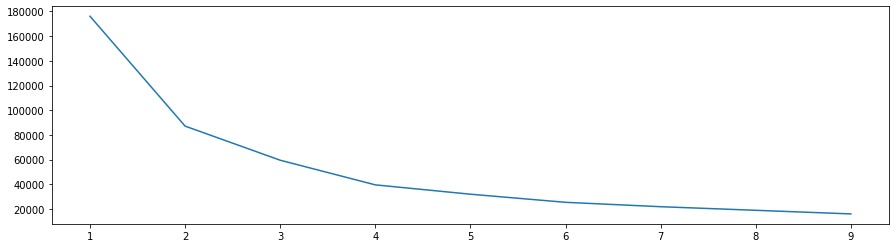

In [11]:
plt.figure(figsize=(15,4))
plt.plot(n_range, n_sse)

In [12]:
km1 = KMeans(n_clusters=4)
y_predicted = km1.fit_predict(df[['Age','Annual Income (k$)']])

In [15]:
df['clusters'] = y_predicted
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [16]:
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1,
       1, 3, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

Text(0, 0.5, 'Annual Income (k$)')

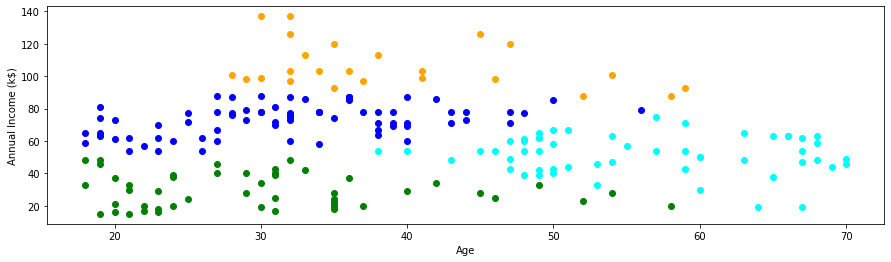

In [18]:
df1 = df[df.clusters == 0]
df2 = df[df.clusters == 1]
df3 = df[df.clusters == 2]
df4 = df[df.clusters == 3]

plt.figure(figsize=(15,4))
plt.scatter(df1.Age, df1['Annual Income (k$)'], color='green')
plt.scatter(df2.Age, df2['Annual Income (k$)'], color='blue')
plt.scatter(df3.Age, df3['Annual Income (k$)'], color='orange')
plt.scatter(df4.Age, df4['Annual Income (k$)'], color='cyan')

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [87]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [92]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

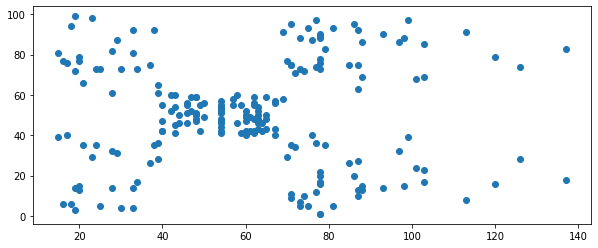

In [114]:
'''age vs annual income cluster'''
plt.figure(figsize=(10, 4))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])

In [119]:
''' train model'''
km= KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])
y_predicted

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [120]:
df['cluster'] = y_predicted
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


Text(0, 0.5, 'Spending Score (1-100)')

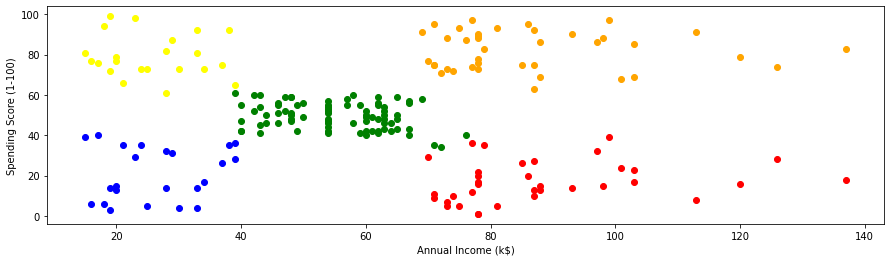

In [121]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]
df5 = df[df.cluster == 4]

# df4 = df[df.cluster == 3]

plt.figure(figsize=(15, 4))
plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color='green')
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='red')
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color='yellow')
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color='orange')
plt.scatter(df5['Annual Income (k$)'], df5['Spending Score (1-100)'], color='blue')

# plt.scatter(df4['Age'], df4['Annual Income (k$)'], color='orange')

'''add the centroids'''
# plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,0], color='purple', marker="*", label='Centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
# plt.legend()

In [113]:
km.cluster_centers_

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [40]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [57]:
'''scale fit the data age'''
scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,0.019231,15,39
1,2,Male,0.057692,15,81
2,3,Female,0.038462,16,6
3,4,Female,0.096154,16,77
4,5,Female,0.250000,17,40


In [58]:
'''scale fit the data Annual Income (k$)'''
scaler = MinMaxScaler()
scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,0.019231,0.000000,39
1,2,Male,0.057692,0.000000,81
2,3,Female,0.038462,0.008197,6
3,4,Female,0.096154,0.008197,77
4,5,Female,0.250000,0.016393,40


In [49]:
'''scale fit the data Spending Score (1-100)'''
scaler = MinMaxScaler()
scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)'] = scaler.transform(df[['Spending Score (1-100)']])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,0.019231,0.000000,0.387755,2
1,2,Male,0.057692,0.000000,0.816327,2
2,3,Female,0.038462,0.008197,0.051020,2
3,4,Female,0.096154,0.008197,0.775510,2
4,5,Female,0.250000,0.016393,0.397959,2


In [59]:
''' train model'''
km= KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Annual Income (k$)']])
y_predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2,
       1, 0, 0, 2, 0, 1, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [60]:
df['cluster'] = y_predicted
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,0.019231,0.000000,39,2
1,2,Male,0.057692,0.000000,81,2
2,3,Female,0.038462,0.008197,6,2
3,4,Female,0.096154,0.008197,77,2
4,5,Female,0.250000,0.016393,40,2


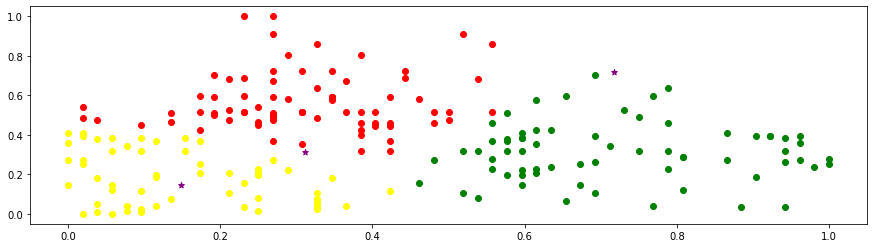

In [61]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
# df4 = df[df.cluster == 3]

plt.figure(figsize=(15, 4))
plt.scatter(df1['Age'], df1['Annual Income (k$)'], color='green')
plt.scatter(df2['Age'], df2['Annual Income (k$)'], color='red')
plt.scatter(df3['Age'], df3['Annual Income (k$)'], color='yellow')
# plt.scatter(df4['Age'], df4['Annual Income (k$)'], color='orange')

'''add the centroids'''
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,0], color='purple', marker="*")


In [66]:
''' plot the elbow'''
my_range = range(1, 10)
sse_ = []
for x in my_range:
    km= KMeans(n_clusters=x)
    km.fit(df[['Age', 'Annual Income (k$)']])
    sse_.append(km.inertia_)
    pass
sse_

[23.583906150363603,
 13.028938428018277,
 7.492113413237457,
 6.072884728742556,
 4.7439501322491475,
 3.868415039003639,
 3.058084466878064,
 2.642693946921811,
 2.3406867403220954]

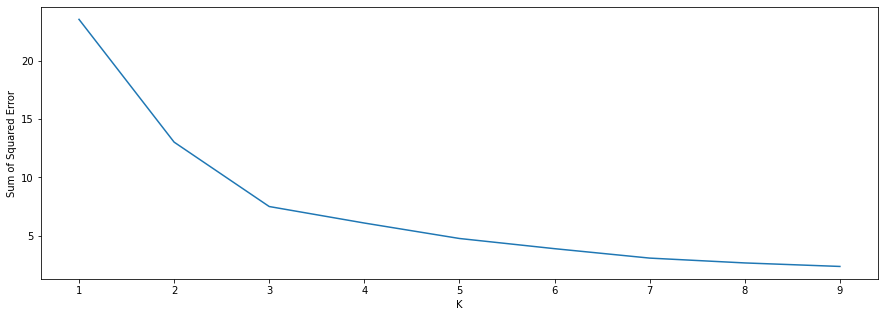

In [67]:
plt.figure(figsize=(15, 5))
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(my_range, sse_)

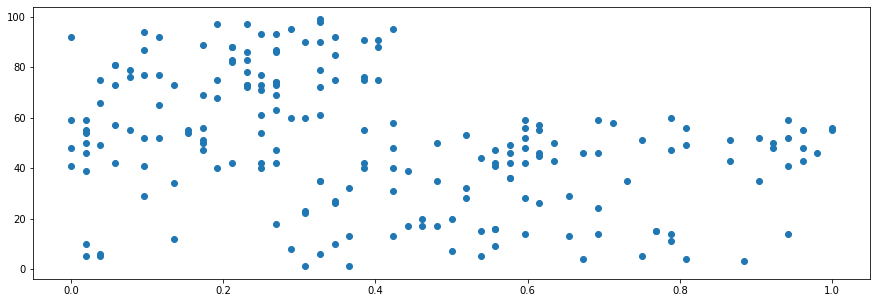

In [68]:
'''age vs spending score cluster'''
plt.figure(figsize=(15, 5))
plt.scatter(df['Age'], df['Spending Score (1-100)'])

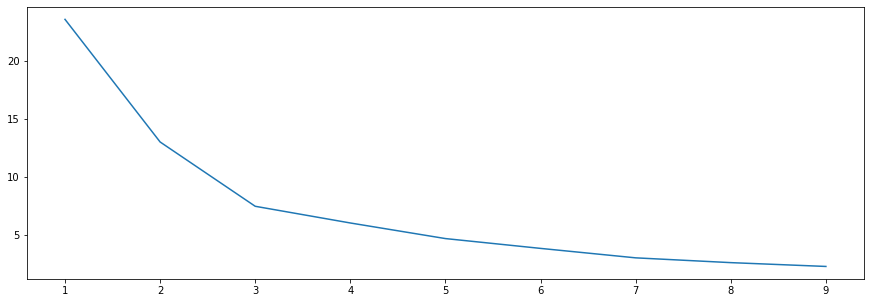

In [69]:
'''find elbow for age vs income clusters'''
my_range = range(1, 10)
sse1 = []
for x in my_range:
    km= KMeans(n_clusters=x)
    km.fit_predict(df[['Age','Annual Income (k$)']])
    sse1.append(km.inertia_)
'''plot k vs sse'''
plt.figure(figsize=(15, 5))
plt.plot(my_range, sse1)

In [70]:
km.cluster_centers_

array([[0.40646853, 0.45417288],
       [0.07239819, 0.08003857],
       [0.89799331, 0.28011404],
       [0.37051282, 0.80491803],
       [0.59698997, 0.20491803],
       [0.25300481, 0.55430328],
       [0.06650641, 0.38285519],
       [0.27884615, 0.13040238],
       [0.64772727, 0.46870343]])

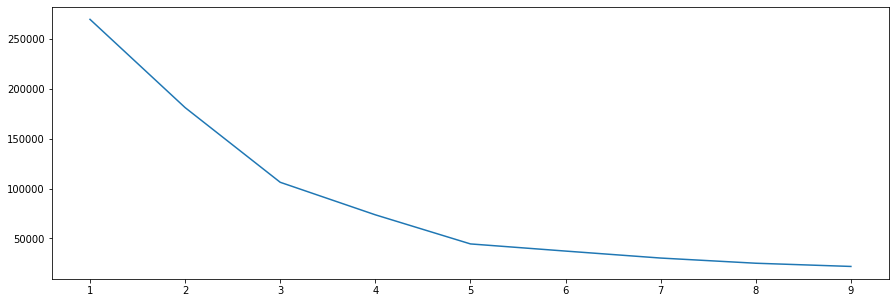

In [103]:
'''find elbow for age vs spending score'''
my_range2 = range(1, 10)
sse2 = []
for x in my_range2:
    km= KMeans(n_clusters=x)
    km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
# 
#     km.fit_predict(df[['Age','Spending Score (1-100)']])
    sse2.append(km.inertia_)
'''plot k vs sse'''
plt.figure(figsize=(15, 5))
plt.plot(my_range2, sse2)

In [93]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [101]:
our_range = (1, 10)
our_sse = []
for x in our_range:
    km = KMeans(n_clusters=x)
    km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
    our_sse.append(km.inertia_)

No handles with labels found to put in legend.


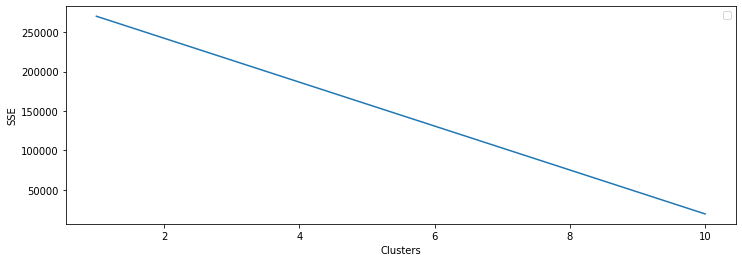

In [102]:
'''plot the elbow'''
plt.figure(figsize=(12, 4))
plt.plot(our_range, our_sse)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.legend()